# Redes neurais Recorrentes (RNN)

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
tf.compat.v1.disable_eager_execution()

### RNN básica - implementação manual

In [3]:
tf.compat.v1.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])
X1 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.compat.v1.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.compat.v1.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.math.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.math.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.compat.v1.global_variables_initializer()

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.compat.v1.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Saída da rede em ambos intervalos para todos os neurônios e todas as instâncias no minilote:

In [4]:
print(Y0_val)

[[-0.9292309   0.21474057 -0.12915571  0.48339853 -0.12168597]
 [-0.9453479   0.9924072  -0.9528377   0.9893008  -0.32115355]
 [-0.9578743   0.9999551  -0.9984886   0.999834   -0.4956883 ]
 [ 1.          0.9999924  -0.9999964   0.99982053 -0.81004506]]


In [5]:
print(Y1_val)

[[ 0.4526714   0.99998546 -0.9997825   0.99997705 -0.98249745]
 [-0.8092     -0.99118733  0.9938392  -0.9163951  -0.8390757 ]
 [ 0.27587575  0.98118156 -0.1959674   0.9657002  -0.92443734]
 [ 0.8012901   0.9927326   0.9985852  -0.05828086  0.9561478 ]]


### Desenrolamento estático através do tempo

In [6]:
tf.compat.v1.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])
X1 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.compat.v1.nn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)
Y0, Y1 = output_seqs

init = tf.compat.v1.global_variables_initializer()

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.compat.v1.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
print(Y0_val)

[[-0.75895983  0.3400113   0.94230473  0.52180266 -0.24049175]
 [-0.99932796  0.8492658   0.99848884  0.9842553  -0.4880398 ]
 [-0.9999983   0.97337997  0.99996144  0.99959934 -0.67597884]
 [-0.9995692  -0.7197753  -0.9989893   0.9990812   0.34861642]]


In [8]:
print(Y1_val)

[[-0.9999998   0.9668398   0.9989235   0.99952376 -0.716678  ]
 [-0.9176656  -0.4178842   0.1343207  -0.6269127  -0.20180708]
 [-0.9999971   0.7315453   0.9682632   0.9812145  -0.51459897]
 [-0.9713243   0.6028014   0.6579353   0.9050441   0.28244194]]


### Desenrolamento dinâmico através do tempo

In [9]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()

X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instância 1
        [[3, 4, 5], [0, 0, 0]], # instância 2
        [[6, 7, 8], [6, 5, 4]], # instância 3
        [[9, 0, 1], [3, 2, 1]], # instância 4
    ])

with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

print(outputs_val)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
[[[ 0.51700026 -0.53753775  0.80512583 -0.28706634 -0.55653304]
  [-0.7321642  -0.99993515  0.23379648 -0.74560183 -0.9999998 ]]

 [[ 0.39513594 -0.9901547   0.94781274 -0.705881   -0.99836606]
  [-0.13300234  0.6276108  -0.86745507  0.33607927 -0.67801356]]

 [[ 0.25757223 -0.9998373   0.9867889  -0.89813447 -0.9999953 ]
  [-0.82658786 -0.990005   -0.8405862  -0.5952307  -0.99999267]]

 [[-0.9453138  -0.9930309  -0.99824226 -0.9850142  -0.99621993]
  [-0.9082471  -0.77422476 -0.8328735  -0.87709147 -0.9963527 ]]]


### Manipulando sentenças de entrada de comprimento variável

In [10]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
seq_length = tf.compat.v1.placeholder(tf.int32, [None])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

init = tf.compat.v1.global_variables_initializer()

X_batch = np.array([
        #step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instância 1
        [[3, 4, 5], [0, 0, 0]], # instância 2 (preenchido com vetor de zeros)
        [[6, 7, 8], [6, 5, 4]], # instância 3
        [[9, 0, 1], [3, 2, 1]], # instância 4
    ])

seq_length_batch = np.array([2, 1, 2, 2])

with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

print(outputs_val)

[[[ 0.93458766 -0.7193072   0.31245053 -0.76001716 -0.923558  ]
  [ 1.         -0.9561068   0.97031444 -0.9994637  -1.        ]]

 [[ 0.9999978  -0.95408326  0.7066738  -0.9949294  -0.9999828 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 1.         -0.9932587   0.8932454  -0.9999052  -1.        ]
  [ 0.9999999  -0.69140786  0.9328227  -0.933578   -0.99999595]]

 [[ 0.9999765   0.9915666  -0.9528005  -0.99862623 -0.9998361 ]
  [ 0.99659544 -0.6414234   0.6648374  -0.6759344  -0.9990536 ]]]


### Treinando um classificador de sequência

In [6]:
tf.compat.v1.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.int32, [None])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.compat.v1.layers.dense(states, n_outputs)
xentropy = tf.compat.v1.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [7]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

X_test = X_test.reshape((-1, n_steps, n_inputs))

In [13]:
n_epochs = 100
batch_size = 150

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, 'Last batch accuracy:', acc_batch, 'Test accuracy:', acc_test)

0 Last batch accuracy: 0.91333336 Test accuracy: 0.9212
10 Last batch accuracy: 1.0 Test accuracy: 0.9741
20 Last batch accuracy: 0.9866667 Test accuracy: 0.9739
30 Last batch accuracy: 1.0 Test accuracy: 0.9793
40 Last batch accuracy: 0.98 Test accuracy: 0.977
50 Last batch accuracy: 1.0 Test accuracy: 0.9786
60 Last batch accuracy: 0.99333334 Test accuracy: 0.9773
70 Last batch accuracy: 0.97333336 Test accuracy: 0.9777
80 Last batch accuracy: 1.0 Test accuracy: 0.9791
90 Last batch accuracy: 0.9866667 Test accuracy: 0.9771


### Prevendo Séries temporais

In [5]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [16]:
tf.compat.v1.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(cell, X, dtype=tf.float32)

n_outputs = 1
learning_rate = 0.001

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

n_iterations = 1500
batch_size = 50
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

with tf.compat.v1.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, '\tMSE:', mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})    
    saver.save(sess, 'model/my_time_series_model')
    
y_pred

0 	MSE: 20.400679
100 	MSE: 0.6562308
200 	MSE: 0.2516394
300 	MSE: 0.099226914
400 	MSE: 0.079162315
500 	MSE: 0.060888298
600 	MSE: 0.049327023
700 	MSE: 0.053943075
800 	MSE: 0.04837853
900 	MSE: 0.05036985
1000 	MSE: 0.044962913
1100 	MSE: 0.051766038
1200 	MSE: 0.042916216
1300 	MSE: 0.043102656
1400 	MSE: 0.046322674


array([[[-3.4285395 ],
        [-2.4873607 ],
        [-1.1441462 ],
        [ 0.64267945],
        [ 2.1547513 ],
        [ 3.0455828 ],
        [ 3.5083144 ],
        [ 3.4149559 ],
        [ 2.8399527 ],
        [ 2.1580863 ],
        [ 1.6326289 ],
        [ 1.5457834 ],
        [ 1.9189045 ],
        [ 2.7590277 ],
        [ 3.8841624 ],
        [ 5.085305  ],
        [ 6.0726795 ],
        [ 6.618793  ],
        [ 6.60153   ],
        [ 6.0408335 ]]], dtype=float32)

### Rnn criativa

INFO:tensorflow:Restoring parameters from model/my_time_series_model


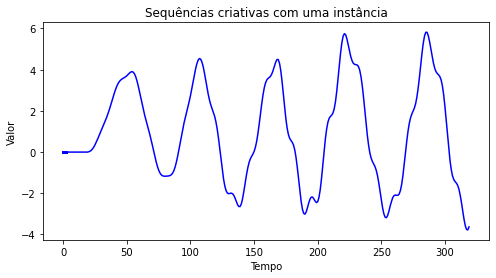

In [18]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'model/my_time_series_model')

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])
        
        
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, 'b-')
plt.plot(t[:n_steps], sequence[:n_steps], 'b-', linewidth=3)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Sequências criativas com uma instância')
plt.show()

### MultiRNNCell

In [19]:
tf.compat.v1.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])

layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()
X_batch = np.random.rand(2, n_steps, n_inputs)
                                    
with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})                                

outputs_val.shape

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


(2, 5, 100)

### Distribuindo a Rnn em vários dispositivos

In [24]:
class DeviceCellWrapper(tf.compat.v1.nn.rnn_cell.RNNCell):
    def __init__(self, device, cell):
        self._cell = cell
        self._device = device

    @property
    def state_size(self):
        return self._cell.state_size

    @property
    def output_size(self):
        return self._cell.output_size

    def __call__(self, inputs, state, scope=None):
        with tf.compat.v1.device(self._device):
            return self._cell(inputs, state, scope)

In [25]:
tf.compat.v1.reset_default_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

devices = ['/cpu:0', '/cpu:0', '/cpu:0']
cells = [DeviceCellWrapper(dev,tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)) for dev in devices]

multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells)
outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict={X: np.random.rand(2, n_steps, n_inputs)}))

[[[-0.01024527  0.07738794  0.08025952 ...  0.04309902  0.06226901
    0.17012335]
  [-0.10363811  0.07130952  0.06840975 ... -0.07937907  0.15951197
    0.1989244 ]
  [-0.22273828  0.3853796   0.16764209 ... -0.10228992 -0.08637314
    0.55426055]
  ...
  [-0.35417774  0.43440124  0.589108   ...  0.24293865 -0.29663736
    0.67660517]
  [-0.20899323  0.76148987  0.5711088  ...  0.33963224 -0.40183413
    0.7646412 ]
  [-0.26786032  0.78920597  0.7057781  ...  0.4577092  -0.20650735
    0.7924192 ]]

 [[ 0.04816885  0.01231821  0.10429928 ...  0.01952618  0.17488609
    0.24252082]
  [ 0.02891437  0.06223075  0.04770555 ...  0.00692777  0.00486861
    0.18008871]
  [-0.2625509   0.03996788  0.02360102 ... -0.12231635  0.01540499
    0.6129265 ]
  ...
  [ 0.00960766  0.5359742   0.65483624 ...  0.04890637 -0.30614293
    0.66255796]
  [-0.2794039   0.63816893  0.5565458  ...  0.07458118 -0.38590625
    0.7760383 ]
  [-0.40246484  0.6730824   0.68278944 ...  0.15472138 -0.2615908
    0.7

### Dropout

In [26]:
tf.compat.v1.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = tf.compat.v1.placeholder_with_default(1.0, shape=())

cells = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
cells_drop = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in cells]

multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)


learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.compat.v1.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch, keep_prob: train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, 'Training MSE:', mse)
    
    saver.save(sess, 'model/my_dropout_time_series_model')

0 Training MSE: 18.4021
100 Training MSE: 4.9550595
200 Training MSE: 4.0437274
300 Training MSE: 3.4854348
400 Training MSE: 3.5706801
500 Training MSE: 3.703458
600 Training MSE: 3.7963727
700 Training MSE: 3.2222974
800 Training MSE: 3.5320468
900 Training MSE: 3.281272
1000 Training MSE: 3.546964
1100 Training MSE: 4.739721
1200 Training MSE: 3.359603
1300 Training MSE: 4.3955126
1400 Training MSE: 3.721893


INFO:tensorflow:Restoring parameters from model/my_dropout_time_series_model


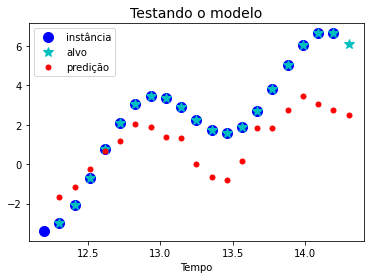

In [31]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'model/my_dropout_time_series_model')

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    
plt.title('Testando o modelo', fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'bo', markersize=10, label='instância')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'c*', markersize=10, label='alvo')
plt.plot(t_instance[1:], y_pred[0,:,0], 'r.', markersize=10, label='predição')
plt.legend(loc='upper left')
plt.xlabel('Tempo')
plt.show()

### LSTM

In [10]:
tf.compat.v1.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.int32, [None])

lstm_cells = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]

logits = tf.compat.v1.layers.dense(top_layer_h_state, n_outputs, name='softmax')
xentropy = tf.compat.v1.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name='loss')

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.compat.v1.global_variables_initializer()

n_epochs = 10
batch_size = 150

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, 'Last batch accuracy:', acc_batch, 'Test accuracy:', acc_test)

0 Last batch accuracy: 0.97333336 Test accuracy: 0.9542
1 Last batch accuracy: 0.97333336 Test accuracy: 0.9688
2 Last batch accuracy: 0.97333336 Test accuracy: 0.9781
3 Last batch accuracy: 0.99333334 Test accuracy: 0.9818
4 Last batch accuracy: 0.9866667 Test accuracy: 0.9848
5 Last batch accuracy: 0.99333334 Test accuracy: 0.9857
6 Last batch accuracy: 1.0 Test accuracy: 0.9878
7 Last batch accuracy: 1.0 Test accuracy: 0.9862
8 Last batch accuracy: 0.99333334 Test accuracy: 0.9873
9 Last batch accuracy: 1.0 Test accuracy: 0.9875
